In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from my_ANN import forward, compute_cost, backward, update_params, predict, score

In [2]:
np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)

np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)

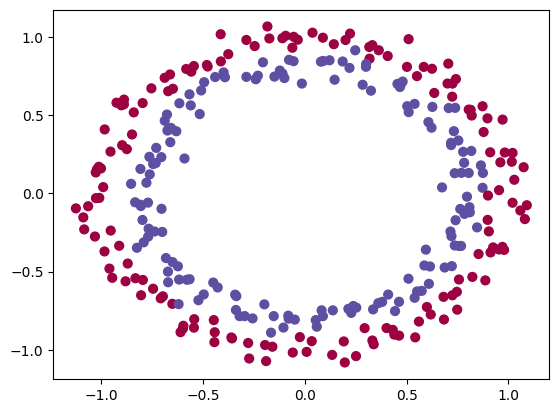

In [3]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);

In [4]:
train_X = train_X.T
train_Y = train_Y.reshape((1, -1))
test_X = test_X.T
test_Y = test_Y.reshape((1, -1))

train_X.shape, train_Y.shape

((2, 300), (1, 300))

# Functions

In [5]:
def my_model(X_train, Y_train, layers, init, learning_rate=0.01, iterations=5000):
    costs = []

    if init == 'zeros':
        params = init_zeros(layers)
    elif init == 'he':
        params = init_He(layers)
    elif init == 'xavier':
        params = init_Xavier(layers)
    elif init == 'lecun':
        params = init_leCun(layers)
    
    # training
    for i in range(1, iterations+1):
        # forward pass
        Y_pred, caches = forward(X_train, params)
        # compute cost
        cost = compute_cost(Y_pred, Y_train)
        costs.append(cost)
        # backward pass to compute gradients
        grads = backward(Y_train, Y_pred, caches)
        # update parameters
        params = update_params(params, grads, learning_rate)

        # print cost
        #if i % 1000 == 0 or i == 1:
            #print('Cost after Iteration {}: {}'.format(i, cost))

    return params, costs

In [6]:
def plot_costs(costs, title):
    plt.figure(figsize=(4,3))
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title(title)
    plt.show()

In [7]:
def plot_decision_boundary(X, y, params):
    """
    X: (n_features, n_samples)
    Y: (1, n_samples)
    """
    x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
    x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
    step = 0.01
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
    
    Y_pred = predict(np.c_[x1.ravel(), x2.ravel()].T, params)  # Y_pred shape (1, -1)
    Y_pred = Y_pred.reshape(x1.shape)
    
    plt.contourf(x1, x2, Y_pred, cmap=plt.cm.Spectral, alpha=0.3)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral, alpha=0.7)
    plt.show()

In [8]:
x1_min, x1_max = train_X[0, :].min() - 1, train_X[0, :].max() + 1
x2_min, x2_max = train_X[1, :].min() - 1, train_X[1, :].max() + 1
step = 0.01

x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
x1.shape, x2.shape

((415, 422), (415, 422))

In [9]:
np.arange(x1_min, x1_max, step).shape

(422,)

In [10]:
np.arange(x2_min, x2_max, step).shape

(415,)

# Types of Initialization

##### https://velog.io/@masibasi/CNNVanishing-Gradient-Weight-initialization

In [11]:
def init_zeros(units_each_layer: list[int]):
    params = {}
    L_including_inputLayer = len(units_each_layer)
    for i in range(1, L_including_inputLayer):
        params[f'W{i}'] = np.zeros(shape=(units_each_layer[i], units_each_layer[i-1]))
        params[f'B{i}'] = np.zeros(shape=(units_each_layer[i], 1))

    return params

In [12]:
def init_He(units_each_layer: list[int]):
    #np.random.seed(3)

    params = {}
    L_including_inputLayer = len(units_each_layer)
    for i in range(1, L_including_inputLayer):
        params[f'W{i}'] = np.random.randn(units_each_layer[i], units_each_layer[i-1]) * np.sqrt(2/(units_each_layer[i-1]))  # He is 2
        params[f'B{i}'] = np.zeros(shape=(units_each_layer[i], 1))

    return params

In [13]:
def init_Xavier(units_each_layer: list[int]):
    #np.random.seed(3)
    
    params = {}
    L_including_inputLayer = len(units_each_layer)
    for i in range(1, L_including_inputLayer):
        params[f'W{i}'] = np.random.randn(units_each_layer[i], units_each_layer[i-1]) * np.sqrt(2/(units_each_layer[i-1] + units_each_layer[i]))
        params[f'B{i}'] = np.zeros(shape=(units_each_layer[i], 1))

    return params

In [14]:
def init_leCun(units_each_layer: list[int]):
    #np.random.seed(3)
    
    params = {}
    L_including_inputLayer = len(units_each_layer)
    for i in range(1, L_including_inputLayer):
        params[f'W{i}'] = np.random.randn(units_each_layer[i], units_each_layer[i-1]) * np.sqrt(1/(units_each_layer[i-1]))  # LeCun is 1
        params[f'B{i}'] = np.zeros(shape=(units_each_layer[i], 1))

    return params

### Zero Initialization

In [15]:
layers = [train_X.shape[0], 10, 5, 1]

In [16]:
params_0, costs_0 = my_model(train_X, train_Y, layers, init='zeros')

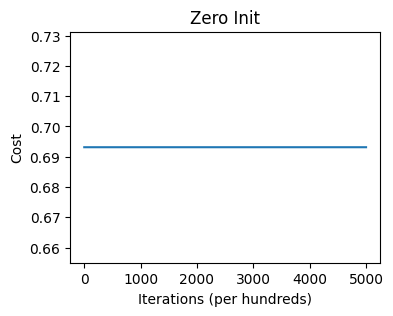

In [17]:
plot_costs(costs_0, title='Zero Init')

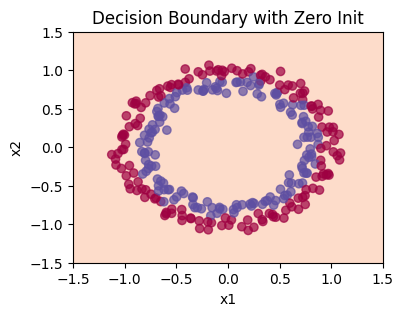

In [18]:
plt.figure(figsize=(4,3))
plt.title("Decision Boundary with Zero Init")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(train_X, train_Y, params_0)

### Kaiming He initialization

In [19]:
params_he, costs_he = my_model(train_X, train_Y, layers, init='he')

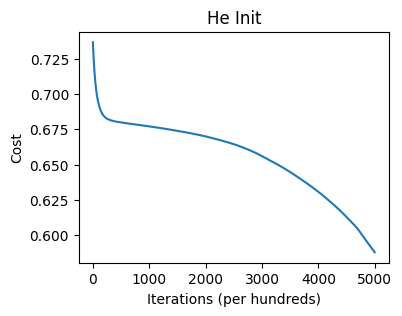

In [20]:
plot_costs(costs_he, title='He Init')

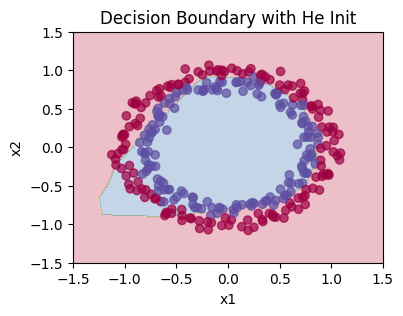

In [21]:
plt.figure(figsize=(4,3))
plt.title("Decision Boundary with He Init")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(train_X, train_Y, params_he)

### LeCun Initialization

In [22]:
params_lecun, costs_lecun = my_model(train_X, train_Y, layers, init='lecun')

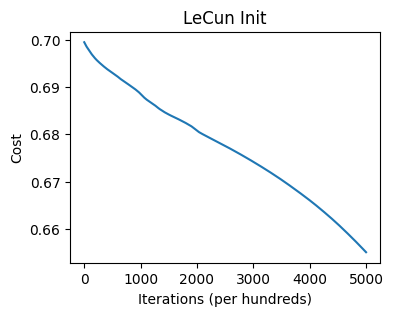

In [23]:
plot_costs(costs_lecun, title='LeCun Init')

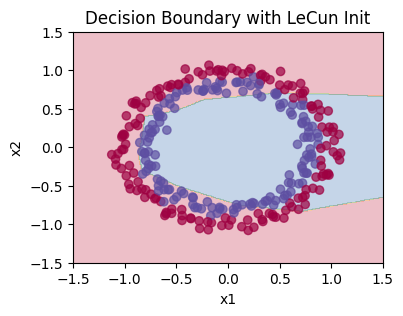

In [24]:
plt.figure(figsize=(4,3))
plt.title("Decision Boundary with LeCun Init")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(train_X, train_Y, params_lecun)

### Xavier Initialization

In [25]:
params_xavier, costs_xavier = my_model(train_X, train_Y, layers, init='xavier')

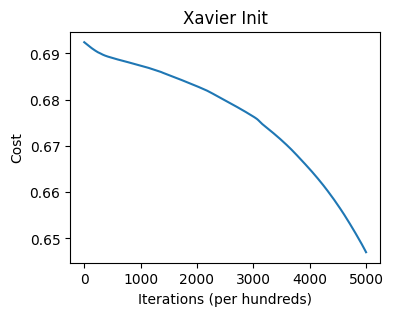

In [26]:
plot_costs(costs_xavier, title='Xavier Init')

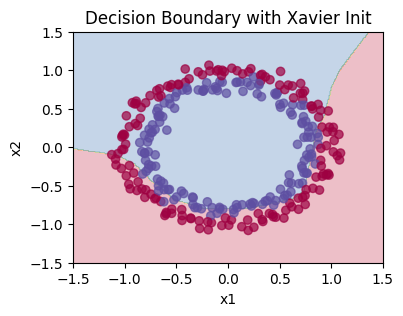

In [27]:
plt.figure(figsize=(4,3))
plt.title("Decision Boundary with Xavier Init")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(train_X, train_Y, params_xavier)